# Making Movies with Matplotlib

In [1]:
'''
TITLE   : Making Movies with Matplotlib
AUTHOR  : Nathaniel Starkman
PROJECT : 11th .Astronomy Conference
'''

__author__ = 'Nathaniel Starkman'
__credits__ = ['J.R. Johansson', 'plotly']

## Introduction

This notebook details how to make and save a movie using the powerful `FuncAnimation` and an update method for a figure.  Movies are an excellent way to communicate science, especially to the public.  Making a movie in Matplotlib is not terribly difficult, but the structure of a movie-plotting function is quite a bit different than for standard Matplotlib.  The real problem is saving a movie.  Depending on your OS and python version the backend can be difficult to set up.  I cover the basics of how to make a movie, and have embedded in a number of example scripts, sourced from Jake Vanderplas and matplotlib.

<br>

Saving animations in Matplotlib can be difficult because Matplotlib needs to interface with operating system tools that may or may not exist on you r computer and may or may not be installed correctly.
I am using a Mac (OS Catalina) with Python 3.7.3 and have only managed to get a working copy of `ffmpeg`, an MP4 encoder, using Homebrew. Conda and pip did not work.

```
Python 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)] :: Anaconda, Inc. on darwin
```


<br>

- - - 

<br>

## Prepare

### Imports

In [2]:
## General
# numpy
import numpy as np
from numpy import sin, cos

from time import time

# Scipy
from scipy.fftpack import fft, ifft
from scipy import integrate, stats
from scipy.spatial.distance import pdist, squareform

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib.lines import Line2D
from matplotlib.animation import FuncAnimation
import mpl_toolkits.mplot3d.axes3d as p3


In [3]:
np.random.seed(0)

<br>

### Functions

The main function we will be using today is `FuncAnimation`.

In [4]:
animation.FuncAnimation?

Init signature:
animation.FuncAnimation(
    fig,
    func,
    frames=None,
    init_func=None,
    fargs=None,
    save_count=None,
    *,
    cache_frame_data=True,
    **kwargs,
)
Docstring:     
Makes an animation by repeatedly calling a function *func*.

Parameters
----------
fig : matplotlib.figure.Figure
   The figure object that is used to get draw, resize, and any
   other needed events.

func : callable
   The function to call at each frame.  The first argument will
   be the next value in *frames*.   Any additional positional
   arguments can be supplied via the *fargs* parameter.

   The required signature is::

      def func(frame, *fargs) -> iterable_of_artists

   If ``blit == True``, *func* must return an iterable of all artists
   that were modified or created. This information is used by the blitting
   algorithm to determine which parts of the figure have to be updated.
   The return value is unused if ``blit == False`` and may be omitted in
   that case.

frames :

<br><br>

- - - 
- - - 

<br><br>

Matplotlib movies are structured into 3 parts: the plot, the initializing function, and the animation function. The animation is built by combining these three elements with `FuncAnimation`.


First, the creation of the figure. This part is the standard matplotlib.

```python
# define the figure & axes
fig, ax = plt.subplots()

# initialize the Line2D, this will be updated by the `animate` function.
line, = ax.plot([], [])
```

Next we make the initialization function. The function should not accept arguments. Consequently, we need to modify the Line2D by searching outside the function scope and accessing the main namespace. The safest way is through global variables, but we don't need that in this simple example.


```python
def initialize_plot_state():
    """Initialization function. Resets the Line2D instance."""
    line.set_data([], [])  # resets the Line2D instance
    return line,  # needs to be a list
# /def
```

The last component is the animation function. This accepts one argument, the frame index.  The animation function sets the state of the Line2D instance. This can be done inside the animate function or by calling another function, in this case the undefined `state_function`.

```python
def animate_plot(i):
    """Animation function. Sets the Line2D instance.
    Only argument is the frame index.
    """
    x, y = state_function(i)
    line.set_data(x, y)
    return line,
# /def
```

All the animation components come together with `FuncAnimation`. We have already seen the docstring, so we know how to call the function. I will point out that `blit=True` is important in this example since the function returns an iterable of all artists that were modified. The blitting algorithm determines the optimal way to update the figure and compress the movie file size.

```python
anim = animation.FuncAnimation(fig, animate_plot, init_func=initialize_plot_state,
                               frames=200, interval=20, blit=True)
```

Last is saving the movie. This can be the most difficult part if the backend is not set up properly.

```python
anim.save('animation.mp4')
```



<br><br>

- - - 
- - - 

<br>

# Examples by Jake Vanderplas

Jake Vanderplas is a python wizard. If you want to make a Python movie, or frankly pretty much anything in Python, check whether Jake Vanderplas has already done it better.

We will work through a few examples. They are located at:

 - https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
 

Mr. Vanderplas asks that his codes include this acknowledgement. Here it is.

```
author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
```

<br>

## Basic Animation

This is an oscillating sine wave.

In [5]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,
# /def

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
# /def

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('../figures/matplotlib/movies/basic_animation.mp4',
          writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

In [6]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/basic_animation.mp4" type="video/mp4">
</video>

<br><br>

- - -

<br>

## General Numerical Solver for the 1D Time-Dependent Schrodinger's equation.  

adapted from code at [animated double pendulum](http://matplotlib.sourceforge.net/examples/animation/double_pendulum_animated.py).

Double pendulum formula translated from the C code [here](http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c).

Now we define state function, in this case the `DoublePendulum` class.

In [7]:
class DoublePendulum:
    """Double Pendulum Class

    init_state is [theta1, omega1, theta2, omega2] in degrees,
    where theta1, omega1 is the angular position and velocity of the first
    pendulum arm, and theta2, omega2 is that of the second pendulum arm
    """
    def __init__(self, init_state = [120, 0, -20, 0],
                 L1=1.0,  # length of pendulum 1 in m
                 L2=1.0,  # length of pendulum 2 in m
                 M1=1.0,  # mass of pendulum 1 in kg
                 M2=1.0,  # mass of pendulum 2 in kg
                 G=9.8,  # acceleration due to gravity, in m/s^2
                 origin=(0, 0)):
        # initialize state parameters
        self.init_state = np.asarray(init_state, dtype='float')
        self.params = (L1, L2, M1, M2, G)
        self.origin = origin
        self.time_elapsed = 0
    
        # set state
        self.state = self.init_state * np.pi / 180.
    # /def
    
    def position(self):
        """Compute the current x,y positions of the pendulum arms."""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([self.origin[0],
                       L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([self.origin[1],
                       -L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        return (x, y)
    # /def

    def energy(self):
        """Compute the energy of the current state."""
        (L1, L2, M1, M2, G) = self.params

        x = np.cumsum([L1 * sin(self.state[0]),
                       L2 * sin(self.state[2])])
        y = np.cumsum([-L1 * cos(self.state[0]),
                       -L2 * cos(self.state[2])])
        vx = np.cumsum([L1 * self.state[1] * cos(self.state[0]),
                        L2 * self.state[3] * cos(self.state[2])])
        vy = np.cumsum([L1 * self.state[1] * sin(self.state[0]),
                        L2 * self.state[3] * sin(self.state[2])])

        U = G * (M1 * y[0] + M2 * y[1])
        K = 0.5 * (M1 * np.dot(vx, vx) + M2 * np.dot(vy, vy))

        return U + K
    # /def
    
    def dstate_dt(self, state, t):
        """Compute the derivative of the given state."""
        (M1, M2, L1, L2, G) = self.params

        dydx = np.zeros_like(state)
        dydx[0] = state[1]
        dydx[2] = state[3]

        cos_delta = cos(state[2] - state[0])
        sin_delta = sin(state[2] - state[0])

        den1 = (M1 + M2) * L1 - M2 * L1 * cos_delta * cos_delta
        dydx[1] = (M2 * L1 * state[1] * state[1] * sin_delta * cos_delta
                   + M2 * G * sin(state[2]) * cos_delta
                   + M2 * L2 * state[3] * state[3] * sin_delta
                   - (M1 + M2) * G * sin(state[0])) / den1

        den2 = (L2 / L1) * den1
        dydx[3] = (-M2 * L2 * state[3] * state[3] * sin_delta * cos_delta
                   + (M1 + M2) * G * sin(state[0]) * cos_delta
                   - (M1 + M2) * L1 * state[1] * state[1] * sin_delta
                   - (M1 + M2) * G * sin(state[2])) / den2
        
        return dydx
    # /def

    def step(self, dt):
        """Execute one time step of length dt and update state."""
        self.state = integrate.odeint(self.dstate_dt, self.state, [0, dt])[1]
        self.time_elapsed += dt
    # /def

# /class

Calling the class.

In [8]:
# set up initial state and global variables
pendulum = DoublePendulum([180., 0.0, -20., 0.0])
dt = 1./30  # 30 fps

Setting up the figure.

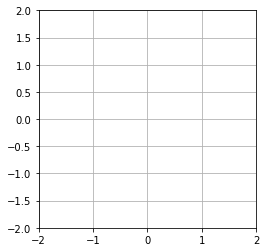

In [9]:
# set up figure and animation
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes);

Creating the initialization function.

In [10]:
def init():
    """Initialize animation."""
    line.set_data([], [])
    time_text.set_text('')
    energy_text.set_text('')

    return line, time_text, energy_text
# /def

Creating the animation function.

In [11]:
def animate(i):
    """Perform animation step"""
    global pendulum, dt
    pendulum.step(dt)

    line.set_data(*pendulum.position())
    time_text.set_text('time = %.1f' % pendulum.time_elapsed)
    energy_text.set_text('energy = %.3f J' % pendulum.energy())

    return line, time_text, energy_text
# /def

In [12]:
# choose the interval based on dt and the time to animate one step
t0 = time()
animate(0)
t1 = time()
interval = 1000 * dt - (t1 - t0)

anim = animation.FuncAnimation(fig, animate, frames=300,
                              interval=interval, blit=True, init_func=init)

In [13]:
# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#ani.save('double_pendulum.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('../figures/matplotlib/movies/double_pendulum.mp4', writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))
plt.close()

In [14]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/double_pendulum.mp4" type="video/mp4">
</video>

<br><br>

- - -

<br>

## Animation of Elastic Collisions with Gravity

This example is similar to the previous example, but increases the number of tracked states from 2 to 50.

In [15]:
class ParticleBox():
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state=[[1, 0, 0, -1],
                             [-0.5, 0.5, 0.5, 0.5],
                             [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G
    # /def

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 
        # /for

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt
    # /def

Calling the class.

In [16]:
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps

Set up figure and animation functions

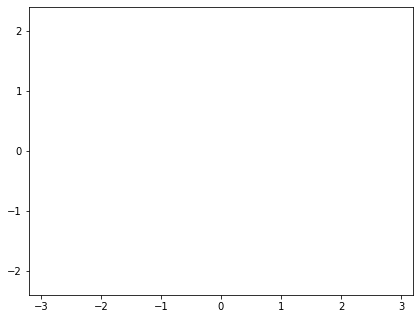

In [17]:
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, = ax.plot([], [], 'bo', ms=6)

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect
# /def

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect
# /def

Creat the animation.

In [18]:
anim = animation.FuncAnimation(fig, animate, frames=600,
                              interval=10, blit=True, init_func=init)


# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
#anim.save('particle_box.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

anim.save('../figures/matplotlib/movies/particle_box.mp4', writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))
plt.close()

In [19]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/particle_box.mp4" type="video/mp4">
</video>

<br><br>

- - - 

<br>

## General Numerical Solver for the 1D Time-Dependent Schrodinger's equation

Sourced from https://jakevdp.github.io/blog/2012/09/05/quantum-python/

In [20]:
class Schrodinger(object):
    """
    Class which implements a numerical solution of the time-dependent
    Schrodinger equation for an arbitrary potential
    """
    def __init__(self, x, psi_x0, V_x,
                 k0 = None, hbar=1, m=1, t0=0.0):
        """
        Parameters
        ----------
        x : array_like, float
            length-N array of evenly spaced spatial coordinates
        psi_x0 : array_like, complex
            length-N array of the initial wave function at time t0
        V_x : array_like, float
             length-N array giving the potential at each x
        k0 : float
            the minimum value of k.  Note that, because of the workings of the
            fast fourier transform, the momentum wave-number will be defined
            in the range
              k0 < k < 2*pi / dx
            where dx = x[1]-x[0].  If you expect nonzero momentum outside this
            range, you must modify the inputs accordingly.  If not specified,
            k0 will be calculated such that the range is [-k0,k0]
        hbar : float
            value of planck's constant (default = 1)
        m : float
            particle mass (default = 1)
        t0 : float
            initial tile (default = 0)
        """
        # Validation of array inputs
        self.x, psi_x0, self.V_x = map(np.asarray, (x, psi_x0, V_x))
        N = self.x.size
        assert self.x.shape == (N,)
        assert psi_x0.shape == (N,)
        assert self.V_x.shape == (N,)

        # Set internal parameters
        self.hbar = hbar
        self.m = m
        self.t = t0
        self.dt_ = None
        self.N = len(x)
        self.dx = self.x[1] - self.x[0]
        self.dk = 2 * np.pi / (self.N * self.dx)

        # set momentum scale
        if k0 == None:
            self.k0 = -0.5 * self.N * self.dk
        else:
            self.k0 = k0
        self.k = self.k0 + self.dk * np.arange(self.N)

        self.psi_x = psi_x0
        self.compute_k_from_x()

        # variables which hold steps in evolution of the
        self.x_evolve_half = None
        self.x_evolve = None
        self.k_evolve = None

        # attributes used for dynamic plotting
        self.psi_x_line = None
        self.psi_k_line = None
        self.V_x_line = None
    # /def

    def _set_psi_x(self, psi_x):
        self.psi_mod_x = (psi_x * np.exp(-1j * self.k[0] * self.x)
                          * self.dx / np.sqrt(2 * np.pi))
    # /def

    def _get_psi_x(self):
        return (self.psi_mod_x * np.exp(1j * self.k[0] * self.x)
                * np.sqrt(2 * np.pi) / self.dx)
    # /def

    def _set_psi_k(self, psi_k):
        self.psi_mod_k = psi_k * np.exp(1j * self.x[0]
                                        * self.dk * np.arange(self.N))
    # /def

    def _get_psi_k(self):
        return self.psi_mod_k * np.exp(-1j * self.x[0] * 
                                        self.dk * np.arange(self.N))
    # /def
    
    def _get_dt(self):
        return self.dt_
    # /def

    def _set_dt(self, dt):
        if dt != self.dt_:
            self.dt_ = dt
            self.x_evolve_half = np.exp(-0.5 * 1j * self.V_x
                                         / self.hbar * dt )
            self.x_evolve = self.x_evolve_half * self.x_evolve_half
            self.k_evolve = np.exp(-0.5 * 1j * self.hbar /
                                    self.m * (self.k * self.k) * dt)
    # /def
    
    psi_x = property(_get_psi_x, _set_psi_x)
    psi_k = property(_get_psi_k, _set_psi_k)
    dt = property(_get_dt, _set_dt)

    def compute_k_from_x(self):
        self.psi_mod_k = fft(self.psi_mod_x)
    # /def

    def compute_x_from_k(self):
        self.psi_mod_x = ifft(self.psi_mod_k)
    # /def

    def time_step(self, dt, Nsteps = 1):
        """
        Perform a series of time-steps via the time-dependent
        Schrodinger Equation.

        Parameters
        ----------
        dt : float
            the small time interval over which to integrate
        Nsteps : float, optional
            the number of intervals to compute.  The total change
            in time at the end of this method will be dt * Nsteps.
            default is N = 1
        """
        self.dt = dt

        if Nsteps > 0:
            self.psi_mod_x *= self.x_evolve_half

        for i in range(Nsteps - 1):
            self.compute_k_from_x()
            self.psi_mod_k *= self.k_evolve
            self.compute_x_from_k()
            self.psi_mod_x *= self.x_evolve

        self.compute_k_from_x()
        self.psi_mod_k *= self.k_evolve

        self.compute_x_from_k()
        self.psi_mod_x *= self.x_evolve_half

        self.compute_k_from_x()

        self.t += dt * Nsteps
    # /def

In [21]:
######################################################################
# Helper functions for gaussian wave-packets

def gauss_x(x, a, x0, k0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((a * np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((x - x0) * 1. / a) ** 2 + 1j * x * k0))

def gauss_k(k,a,x0,k0):
    """
    analytical fourier transform of gauss_x(x), above
    """
    return ((a / np.sqrt(np.pi))**0.5
            * np.exp(-0.5 * (a * (k - k0)) ** 2 - 1j * (k - k0) * x0))

In [22]:
######################################################################
# Utility functions for running the animation

def theta(x):
    """
    theta function :
      returns 0 if x<=0, and 1 if x>0
    """
    x = np.asarray(x)
    y = np.zeros(x.shape)
    y[x > 0] = 1.0
    return y

def square_barrier(x, width, height):
    return height * (theta(x) - theta(x - width))

In [23]:
######################################################################
# Create the animation

# specify time steps and duration
dt = 0.01
N_steps = 50
t_max = 120
frames = int(t_max / float(N_steps * dt))

# specify constants
hbar = 1.0   # planck's constant
m = 1.9      # particle mass

# specify range in x coordinate
N = 2 ** 11
dx = 0.1
x = dx * (np.arange(N) - 0.5 * N)

# specify potential
V0 = 1.5
L = hbar / np.sqrt(2 * m * V0)
a = 3 * L
x0 = -60 * L
V_x = square_barrier(x, a, V0)
V_x[x < -98] = 1E6
V_x[x > 98] = 1E6

# specify initial momentum and quantities derived from it
p0 = np.sqrt(2 * m * 0.2 * V0)
dp2 = p0 * p0 * 1./80
d = hbar / np.sqrt(2 * dp2)

k0 = p0 / hbar
v0 = p0 / m
psi_x0 = gauss_x(x, d, x0, k0)

# define the Schrodinger object which performs the calculations
S = Schrodinger(x=x,
                psi_x0=psi_x0,
                V_x=V_x,
                hbar=hbar,
                m=m,
                k0=-28)

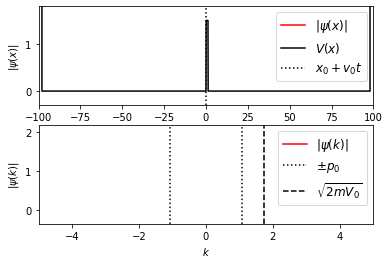

In [24]:
######################################################################
# Set up plot
fig = plt.figure()

# plotting limits
xlim = (-100, 100)
klim = (-5, 5)

# top axes show the x-space data
ymin = 0
ymax = V0
ax1 = fig.add_subplot(211, xlim=xlim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_x_line, = ax1.plot([], [], c='r', label=r'$|\psi(x)|$')
V_x_line, = ax1.plot([], [], c='k', label=r'$V(x)$')
center_line = ax1.axvline(0, c='k', ls=':',
                          label = r"$x_0 + v_0t$")

title = ax1.set_title("")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$|\psi(x)|$')

# bottom axes show the k-space data
ymin = abs(S.psi_k).min()
ymax = abs(S.psi_k).max()
ax2 = fig.add_subplot(212, xlim=klim,
                      ylim=(ymin - 0.2 * (ymax - ymin),
                            ymax + 0.2 * (ymax - ymin)))
psi_k_line, = ax2.plot([], [], c='r', label=r'$|\psi(k)|$')

p0_line1 = ax2.axvline(-p0 / hbar, c='k', ls=':', label=r'$\pm p_0$')
p0_line2 = ax2.axvline(p0 / hbar, c='k', ls=':')
mV_line = ax2.axvline(np.sqrt(2 * V0) / hbar, c='k', ls='--',
                      label=r'$\sqrt{2mV_0}$')
ax2.legend(prop=dict(size=12))
ax2.set_xlabel('$k$')
ax2.set_ylabel(r'$|\psi(k)|$')

V_x_line.set_data(S.x, S.V_x);

In [25]:
######################################################################
# Animate plot
def init():
    psi_x_line.set_data([], [])
    V_x_line.set_data([], [])
    center_line.set_data([], [])

    psi_k_line.set_data([], [])
    title.set_text("")
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

def animate(i):
    S.time_step(dt, N_steps)
    psi_x_line.set_data(S.x, 4 * abs(S.psi_x))
    V_x_line.set_data(S.x, S.V_x)
    center_line.set_data(2 * [x0 + S.t * p0 / m], [0, 1])

    psi_k_line.set_data(S.k, abs(S.psi_k))
    title.set_text("t = %.2f" % S.t)
    return (psi_x_line, V_x_line, center_line, psi_k_line, title)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=30, blit=True)


# uncomment the following line to save the video in mp4 format.  This
# requires either mencoder or ffmpeg to be installed on your system
anim.save('../figures/matplotlib/movies/schrodinger_barrier.mp4', writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

In [26]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/schrodinger_barrier.mp4" type="video/mp4">
</video>

<br><br><br><br><br><br>

- - - 
- - - 

<br>

# Examples from Matplotlib

## Bayes Update

Sourced from [https://matplotlib.org/examples/animation/bayes_update.html](https://matplotlib.org/examples/animation/bayes_update.html)

In [27]:
# update a distribution based on new data.

class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')
    # /def

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,
    # /def

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = stats.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,
    # /def
# /class

In [27]:
fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = animation.FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                               interval=100, blit=True)

anim.save('../figures/matplotlib/movies/bayes_update.mp4', writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

In [28]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/bayes_update.mp4" type="video/mp4">
</video>

<br><br>

- - -

<br>

## Simple 3D animation

Sourced from [https://matplotlib.org/examples/animation/simple_3danim.html](https://matplotlib.org/examples/animation/simple_3danim.html)

In [29]:
def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData
# /def


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines
# /def

In [29]:
# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
anim = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

anim.save('../figures/matplotlib/movies/simple_3danim.mp4', writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

In [30]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/simple_3danim.mp4" type="video/mp4">
</video>

<br><br>

- - - 

<br>

## Animated Subplots

Sourced from [https://matplotlib.org/examples/animation/subplots.html](https://matplotlib.org/examples/animation/subplots.html)

In [31]:
class SubplotAnimation(animation.TimedAnimation):

    def __init__(self):
        
        # initialize properties
        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t
        
        # set up figure
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        # Axes 1
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D([], [], color='red', marker='o',
                             markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')

        # Axes 2
        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)

        # Axes 3
        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)

        # start animation
        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)
    # /def

    def _draw_frame(self, framedata):
        """The set_data method."""

        i = framedata
        head = i - 1
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.y[:i], self.z[:i])
        self.line2a.set_data(self.y[head_slice], self.z[head_slice])
        self.line2e.set_data(self.y[head], self.z[head])

        self.line3.set_data(self.x[:i], self.z[:i])
        self.line3a.set_data(self.x[head_slice], self.z[head_slice])
        self.line3e.set_data(self.x[head], self.z[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]
    # /def

    def new_frame_seq(self):
        return iter(range(self.t.size))
    # /def

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])
    # /def

<br>

Make subplot animation

In [32]:
anim = SubplotAnimation()

# saving
anim.save('../figures/matplotlib/movies/subplots_by_Subplot.mp4',
          writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

In [33]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/subplots_by_Subplot.mp4" type="video/mp4">
</video>

<br><br>

- - - 

<br>

## Rain Movie

Sourced from https://matplotlib.org/gallery/animation/rain.html

In [37]:
# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])

    return
# /def


# Construct the animation, using the update function as the animation director.
anim = FuncAnimation(fig, update, interval=10)

# saving
anim.save('../figures/matplotlib/movies/rain.mp4',
          writer=animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264']))

plt.close()

/Users/nathanielstarkman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  if sys.path[0] == '':


In [38]:
%%HTML

<video width=640" height="480" controls>
  <source src="../figures/matplotlib/movies/rain.mp4" type="video/mp4">
</video>

<br><br>

- - - 
- - - 

<span style='font-size:40px;font-weight:650'>
    END
</span>